In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error



ModuleNotFoundError: No module named 'yfinance'

In [2]:
!pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 20.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 17.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=13b4137cfc1437972ca1b1dd26e82c80b983cb70eec549423959e29e9078183d
  Stored in directory: /Users/prernapawar/Library/Caches/pip/wheels/a6/5e/0f/8319805c4115320e0d3e8fb5799b114a2e4c4a3d6c7e523b06
Successfully built peewee


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'keras'

In [4]:
!pip install keras


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.9 MB/s eta 0:00:00a 0:00:01
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.2/750.2 kB 11.3 MB/s eta 0:00:00 0:00:01
Using cached namex-0.0.8-py3-none-any.whl (5.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 25.1 MB/s eta 0:00:00


In [5]:
!pip install tensorflow


  Using cached tensorflow-2.17.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.17.0-cp312-cp312-macosx_12_0_arm64.whl (236.3 MB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
Using cached gast-0.6.0-py3-none-any.whl (21 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [8]:
ticker = 'AAPL'  # Apple Inc.
stock_data = yf.download(ticker, start='2015-01-01', end='2023-01-01')
stock_data = stock_data[['Close']] 

[*********************100%***********************]  1 of 1 completed


In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data)

In [10]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [11]:
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [12]:
time_step = 60  
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [14]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
from keras.layers import Input


model = Sequential()
model.add(Input(shape=(time_step, 1)))  # Input layer
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [16]:
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0219
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0011
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.5551e-04
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.8309e-04
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.2771e-04
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.1233e-04
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.2534e-04
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.9400e-04
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.2868e-04
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.8522e-04
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.0052e-04
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.2800e-04
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.1623e-04
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.0243e-04
Epoch 15/50
25/25 ━━━━━

In [17]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [18]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

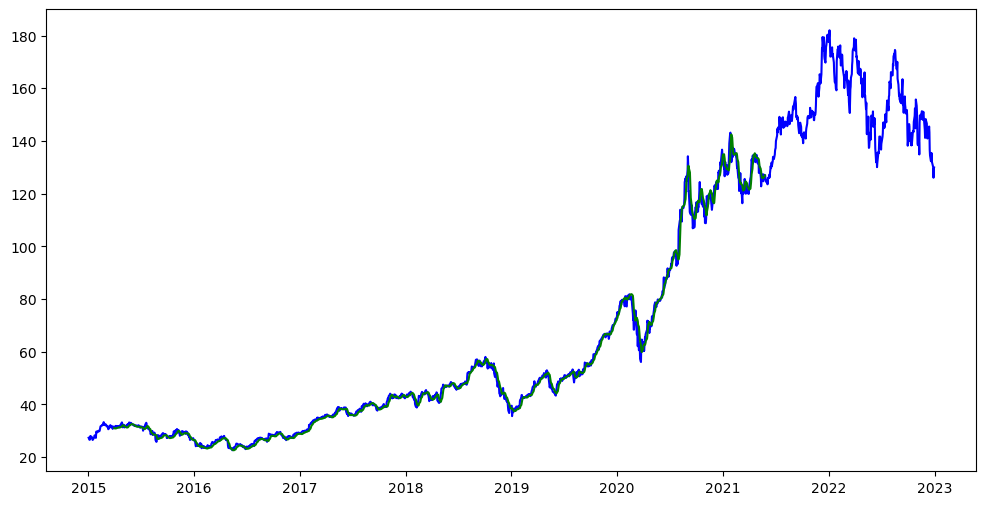

In [19]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label='Actual Price', color='blue')
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict)+time_step, :] = train_predict
plt.plot(stock_data.index, train_plot, label='Train Prediction', color='green')


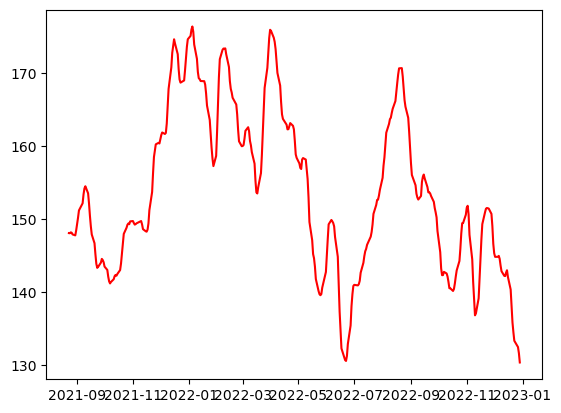

In [20]:
test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_step*2)+1:len(scaled_data)-1, :] = test_predict
plt.plot(stock_data.index, test_plot, label='Test Prediction', color='red')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


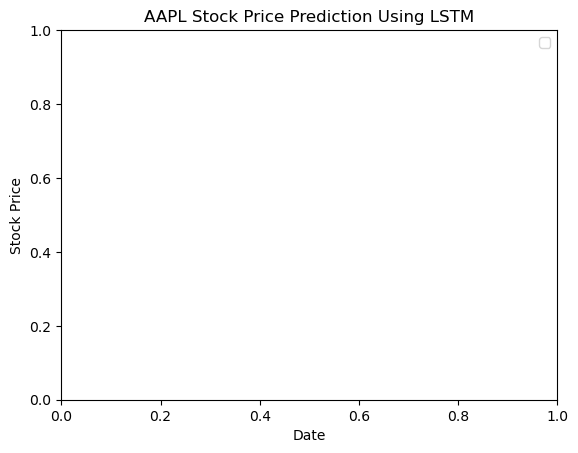

In [21]:
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{ticker} Stock Price Prediction Using LSTM')
plt.legend()
plt.show()

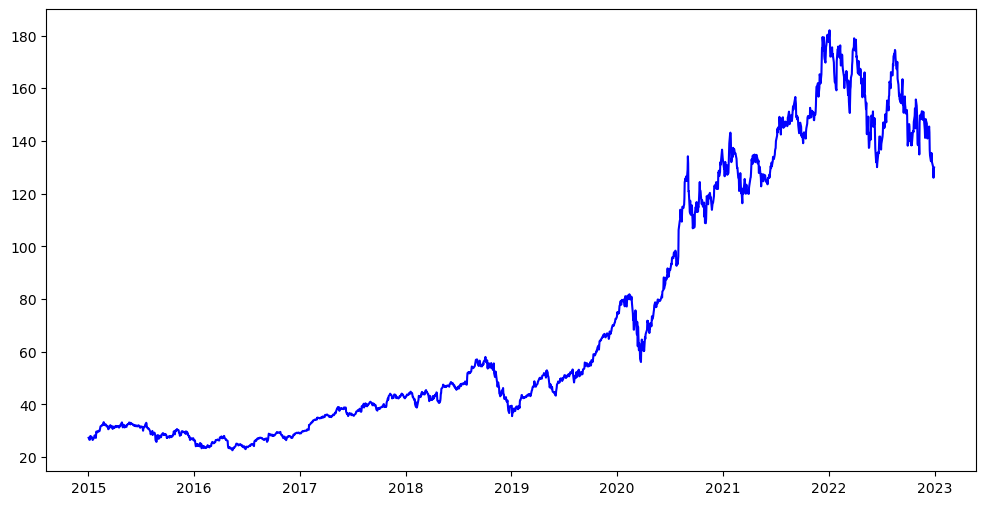

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Actual Price', color='blue')

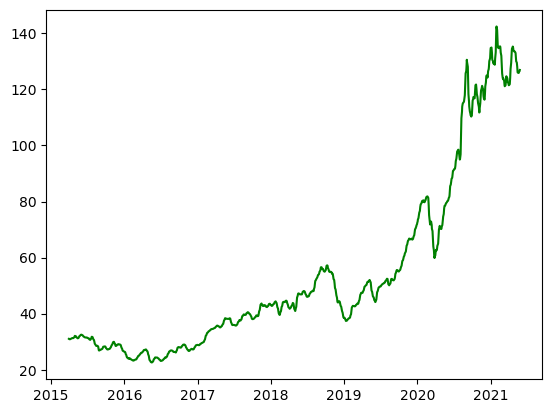

In [23]:
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict)+time_step, :] = train_predict
plt.plot(stock_data.index, train_plot, label='Train Prediction', color='green')

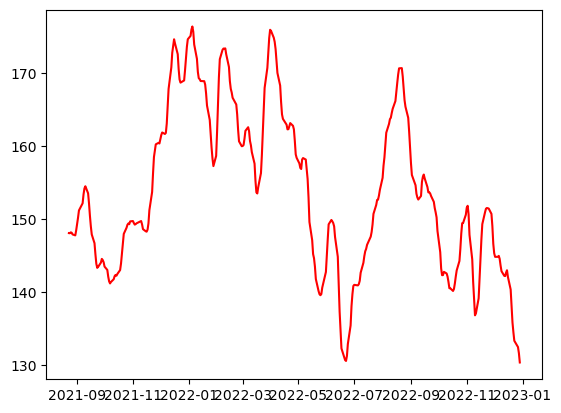

In [24]:
test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_step*2)+1:len(scaled_data)-1, :] = test_predict
plt.plot(stock_data.index, test_plot, label='Test Prediction', color='red')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


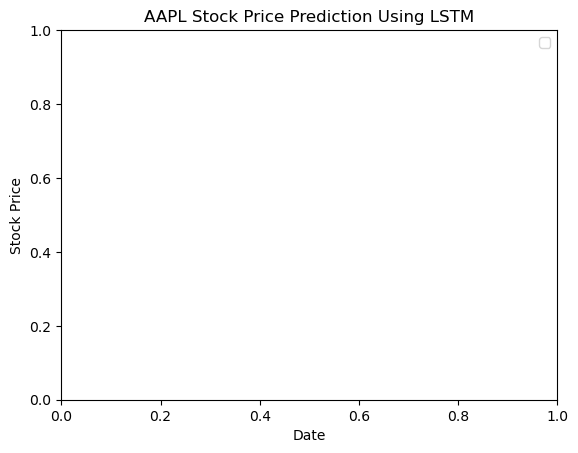

In [25]:
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{ticker} Stock Price Prediction Using LSTM')
plt.legend()  # This will now find labels and create the legend
plt.show()

In [26]:
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Training RMSE: 1.9402538447451
Test RMSE: 4.696640522760495
